In [16]:
!pip install pandas
!pip install spotipy

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [20]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from statistics import mean
# https://developer.spotify.com/documentation/web-api/reference/get-audio-features
# in case any seem relevant
# spotify api credentials (should really keep these private but its alright i think - just dont share)
client_id = "5234f662dc954d598c3f8d9959f6bbaf"
client_secret = "97d9c0c5d85e416d826c67bdefa75dda"


client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spoti = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

def get_audio_feature(audio_feature, track_name, track_artist):

    results = spoti.search(q=f"track:{track_name} artist:{track_artist}", type='track', limit=1)


    if results['tracks']['items']:
        track_id = results['tracks']['items'][0]['id']
    else:
        return None

    audio_features = spoti.audio_features(tracks=[track_id])

    if audio_features:
        selected_feature = audio_features[0].get(audio_feature)
        return selected_feature
    else:
        return None

def get_audio_feature_id(audio_feature, track_id):


    audio_features = spoti.audio_features(tracks=[track_id])


    if audio_features:
        selected_feature = audio_features[0].get(audio_feature)
        return selected_feature
    else:
        return None
    
#example to get audio feature
print(get_audio_feature('valence', 'overreacting', 'hkmori'))

Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache


0.493


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
tracks = list(df['Track'].values[:500])
artists = list(df['Artist'].values[:500])
valence_list = []
for x in range(len(tracks)):
    
    e = valence_list.append(get_audio_feature('valence', tracks[x], artists[x]))
    if e is not None:
        valence_list.append(e)
    else:
        pass



Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at:

Text(0, 0.5, 'Valence 0-1')

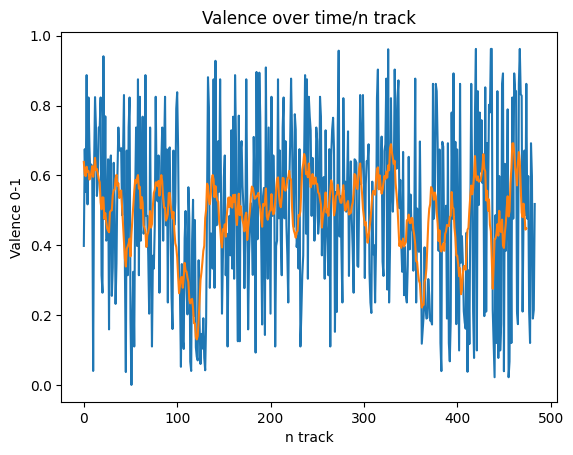

In [41]:
# moving average with np.convolve
import numpy as np

def moving_average(data, window_size):
    weights = np.repeat(1.0, window_size) / window_size
    return np.convolve(data, weights, 'valid')

valence_list = [value for value in valence_list if value is not None]
e = moving_average(valence_list, 10)
plt.plot(valence_list)
plt.plot(e)
plt.title("Valence over time/n track")
plt.xlabel("n track")
plt.ylabel("Valence 0-1")

In [25]:
print(valence_list)

[0.398, 0.675, 0.553, 0.887, 0.517, 0.823, 0.682, 0.601, 0.631, 0.618, 0.04, None, 0.624, 0.824, 0.737, 0.541, 0.582, 0.737, 0.737, 0.823, 0.314, 0.264, 0.941, 0.475, 0.769, 0.413, 0.417, 0.646, 0.159, 0.63, 0.657, 0.255, 0.336, 0.636, 0.516, 0.232, 0.349, 0.6, 0.737, 0.671, 0.671, 0.678, 0.486, 0.657, 0.83, 0.336, 0.0369, 0.671, 0.314, 0.737, 0.823, 0.188, 0, 0.185, 0.324, 0.11, 0.549, 0.737, 0.398, 0.875, 0.314, 0.825, 0.413, 0.553, None, 0.768, 0.433, 0.457, 0.887, 0.484, 0.484, 0.371, 0.204, 0.737, None, 0.398, 0.11, 0.37, 0.333, 0.457, 0.825, 0.564, 0.526, 0.657, 0.264, 0.498, 0.639, 0.737, 0.413, 0.675, 0.825, None, 0.457, 0.674, 0.236, 0.671, 0.68, 0.448, 0.25, 0.16]


In [50]:
# attempt 2 with past 500 songs

import warnings


# Filter out UserWarnings related to the cache
warnings.filterwarnings("ignore", category=UserWarning, module="spotipy.oauth2")


tracks = list(df['Track'].values[::-1][:100])
artists = list(df['Artist'].values[::-1][:100])
valence_list = []
for x in range(len(tracks)):
    
    e = valence_list.append(get_audio_feature('valence', tracks[x], artists[x]))
    if e is not None:
        valence_list.append(e)
    else:
        pass


KeyError: 'Track'

In [51]:
# moving average with np.convolve
import numpy as np

def moving_average(data, window_size):
    weights = np.repeat(1.0, window_size) / window_size
    return np.convolve(data, weights, 'valid')

valence_list = [value for value in valence_list if value is not None][::-1]
e = moving_average(valence_list, 5)
plt.plot(valence_list)
plt.plot(e)
plt.title("Valence over time/n track")
plt.xlabel("n track")
plt.ylabel("Valence 0-1")

NameError: name 'valence_list' is not defined

/tmp/ipykernel_37506/3192282772.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


843
12097.467502553181


/tmp/ipykernel_37506/3192282772.py:40: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  liked = str(df['Liked'][track_index])


Text(0, 0.5, 'band power')

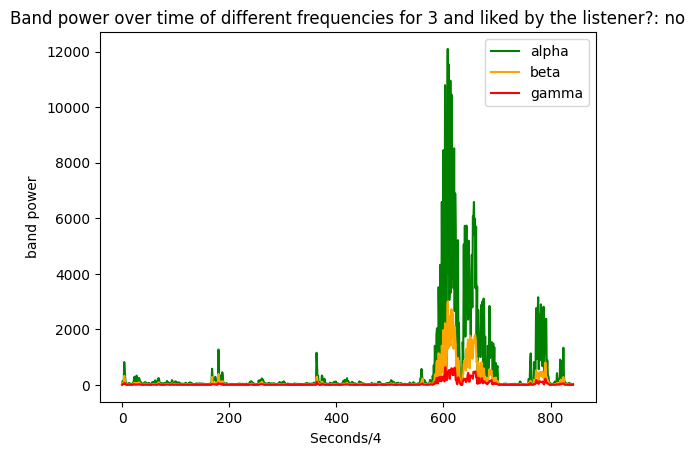

In [2]:
import csv 
# Load pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from statistics import mean

client_id = "5234f662dc954d598c3f8d9959f6bbaf"
client_secret = "97d9c0c5d85e416d826c67bdefa75dda"


client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spoti = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

def find_differences(inp_arr):
    diffs = []
    for x in range(len(inp_arr)-1):
        diffs.append(inp_arr[x+1]-inp_arr[x])
    max(range(len(values)), key=values.__getitem__)

def moving_average(data, window_size):
    weights = np.repeat(1.0, window_size) / window_size
    return np.convolve(data, weights, 'valid')
# Read CSV file into DataFrame df
df = pd.read_csv('/home/aditya/Documents/projectmusic_newdelim.csv', index_col=0)

# Show dataframe
#print(df)
#print(df.columns)
#print(list(df['channel3'])[0])

likedict ={
    "1":"yes",
    "0":"no"
}
track_index = 3
track_id = str(df['SongID'])[1]
liked = str(df['Liked'][track_index])
a = eval(list(df['channel3'])[track_index])
print(len(a['alpha']))
print(max(a['alpha']))
alpha = a['alpha']
beta = a['beta']
gamma = a['gamma']
theta = a['theta']
delta = a['delta']

plt.plot(alpha,color="green",label="alpha")
plt.plot(beta, color="orange",label="beta")
plt.plot(gamma,color="red",label="gamma")
#plt.plot(theta,color="blue",label="theta")
#plt.plot(delta,color="yellow",label="delta")
plt.title("Band power over time of different frequencies for "+str(track_index)+" and liked by the listener?: "+likedict[liked])
plt.legend()
plt.xlabel("Seconds/4 ")
plt.ylabel("band power")

#plt.plot(moving_average(a['alpha'],10))

[0, 0.0717615154209299, 0, 0.04643589535168567, 0.07765919208638589, 0.09187699393846695, 0.1275791306981573, 0.1073400325496114, 0.23634413739744117, 0.12846138222586637, 0.18949057161575547, 0.0878360981277381, 0.022024133007117752, 0.11741307969640401, 0.040958779334682935, 0, 0.06736152932423431, 0.16062189607892852, 0.21497096385563044, 0.09881031370854981, 0.12123784414380687, 0.22817594523951207, 0.1501637925329842, 0.11511419190550945, 0, 0.047558291603958976, 0.04828783165920665, 0.13951667528909045, 0.09570656813417858, 0.33989997980878583, 0.24322342025297586, 0.1272775705578282, 0.2567050007790604, 0.2601718474924506, 0.14441675214303956, 0.1387749962722914, 0.10886758504717581, 0.11624011501363422, 0.15413788497587796, 0.11010075172648183, 0.1781856057706335, 0.1633361237953326, 0.09896309301894962, 0.12871657886181562, 0.13350367138425404, 0.11829571057187853, 0.22492666084883786, 0.05884417274064094, 0.17506725247764923, 0.3147026583057826, 0.2831063875655956, 0.12052219

/tmp/ipykernel_152801/330275323.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if(df['Listening'][track_index]==2):
/tmp/ipykernel_152801/330275323.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  liked = str(df['Liked'][track_index])
/tmp/ipykernel_152801/330275323.py:32: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  calmdata = df['calmdata'][track_index]
/tmp/ipykernel_152801/330275323.py:34: FutureWarning: Series.__geti

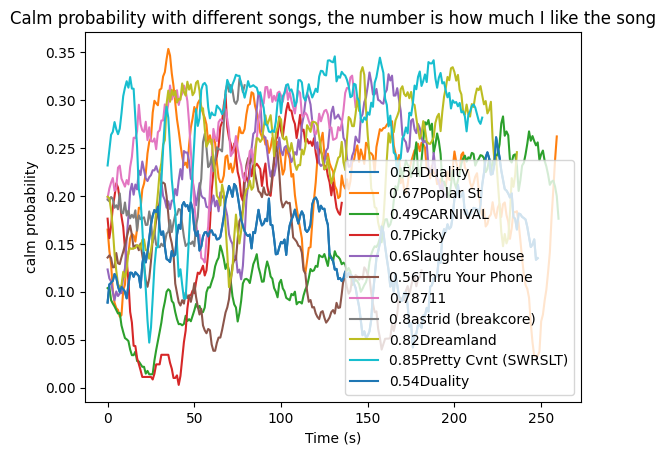

In [4]:
import csv 
# Load pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statistics import mean



def find_differences(inp_arr):
    diffs = []
    for x in range(len(inp_arr)-1):
        diffs.append(inp_arr[x+1]-inp_arr[x])
    max(range(len(values)), key=values.__getitem__)

def moving_average(data, window_size):
    weights = np.repeat(1.0, window_size) / window_size
    return np.convolve(data, weights, 'valid')
df = pd.read_csv('/home/aditya/Documents/projectmusic_calm.csv', index_col=0)
df.head()

scatter_spectrum = []
scatter_calm = []
scatter_calm_sd = []
liked_bool = []
song_id = []
for x in range(len(df['calmdata'])+1):
    track_index = x-1
    #track_id = str(df['Song_id'])[track_index]
    if(df['Listening'][track_index]==2):
        liked = str(df['Liked'][track_index])
        calmdata = df['calmdata'][track_index]
        print(eval(calmdata))
        plt.plot(moving_average(eval(calmdata),10),label=str(df['Spectrum'][track_index])+str(df['Song_name'][track_index]))
        # to make the scatterplot
        scatter_spectrum.append(df['Spectrum'][track_index])
        print(df['Spectrum'][track_index])
        scatter_calm.append(mean(eval(df['calmdata'][track_index])))
        scatter_calm_sd.append(np.std(eval(df['calmdata'][track_index])))
        liked_bool.append(int(df['Liked'][track_index]))
        song_id.append(df['Song_id'][track_index])
    else:
        pass
print(scatter_spectrum)
plt.xlabel("Time (s)")
plt.ylabel("calm probability")
plt.title("Calm probability with different songs, the number is how much I like the song")
plt.legend()

Text(0.5, 1.0, 'Scatter plot showing mean calm prob over the course of song against how much I like the song')

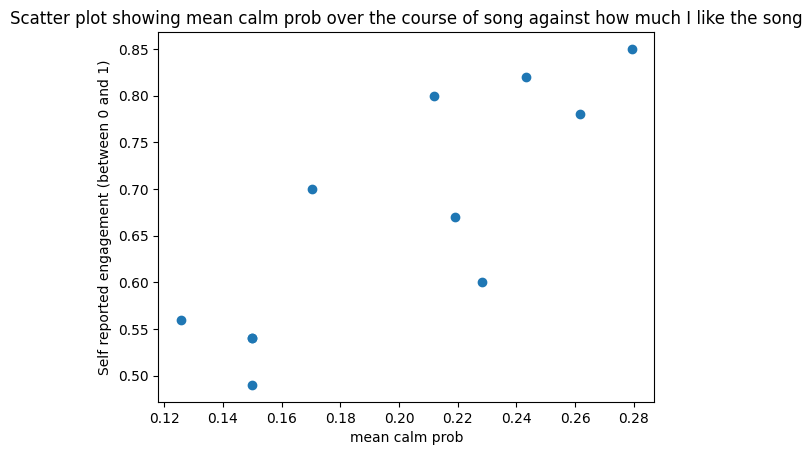

In [5]:

plt.scatter(scatter_calm,scatter_spectrum)
plt.ylabel("Self reported engagement (between 0 and 1)")
plt.xlabel("mean calm prob")
plt.title("Scatter plot showing mean calm prob over the course of song against how much I like the song")

Text(0.5, 1.0, 'Scatter plot showing std dev calm prob over the course of song against how much I like the song')

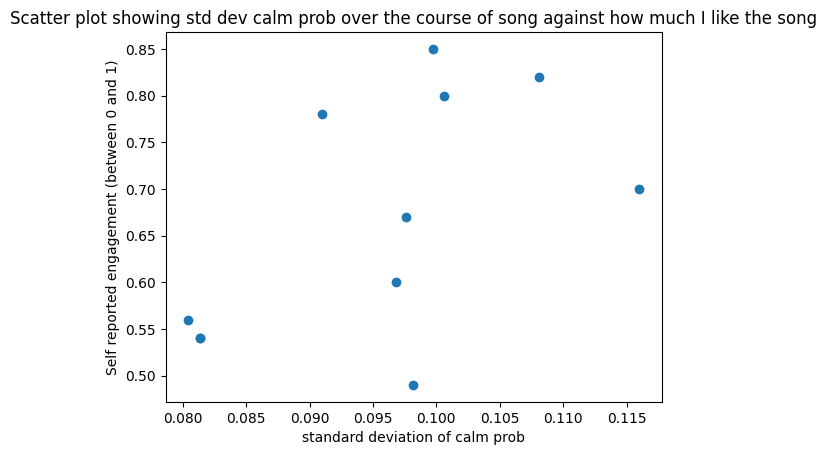

In [6]:

plt.scatter(scatter_calm_sd,scatter_spectrum)
plt.ylabel("Self reported engagement (between 0 and 1)")
plt.xlabel("standard deviation of calm prob")
plt.title("Scatter plot showing std dev calm prob over the course of song against how much I like the song")

[0.219107234376551, 0.17032553564331407, 0.2616950734966782, 0.21209450483908224, 0.24332666244531845, 0.27934377222885454]


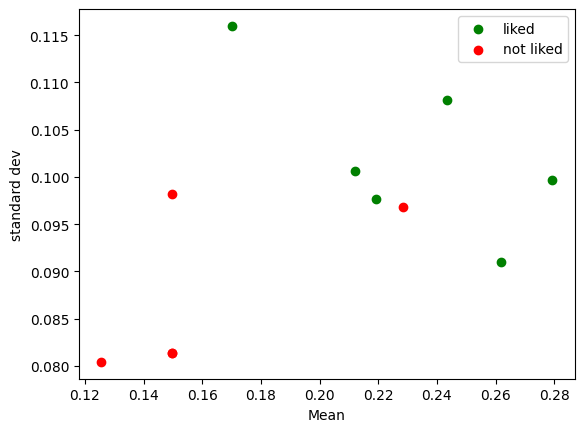

In [7]:
# to make the support vector machine

means_liked = []
stds_liked = []
means_notliked = []
stds_notliked = []

for x in range(len(liked_bool)):
    if liked_bool[x] == 1:
        means_liked.append(scatter_calm[x])
        stds_liked.append(scatter_calm_sd[x])
    if liked_bool[x] == 0:
        means_notliked.append(scatter_calm[x])
        stds_notliked.append(scatter_calm_sd[x])

print(means_liked)

plt.scatter(means_liked, stds_liked, color='green', label='liked')
plt.scatter(means_notliked, stds_notliked, color='red', label='not liked')

# Adding labels and legend
plt.xlabel("Mean")
plt.ylabel("standard dev")
plt.legend()

# Display the plot
plt.show()

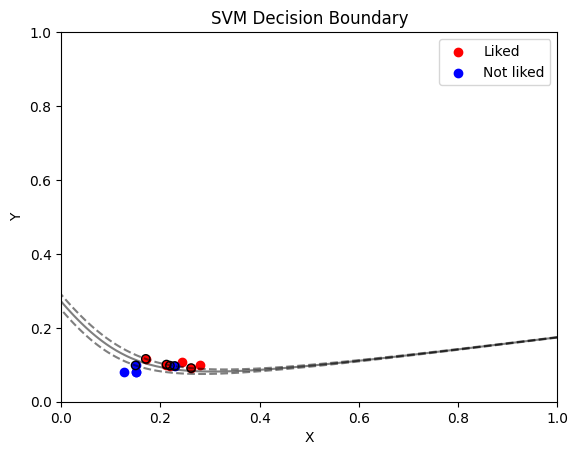

In [8]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt

# Data
x_a = np.array(means_liked)
y_a = np.array(stds_liked)

x_b = np.array(means_notliked)
y_b = np.array(stds_notliked)


X = np.vstack((np.column_stack((x_a, y_a)), np.column_stack((x_b, y_b))))
Y = np.hstack((np.zeros(len(x_a)), np.ones(len(x_b))))


svm_model = svm.SVC(kernel='poly', C=1.0)

svm_model.fit(X, Y)

xx, yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.scatter(x_a, y_a, color='red', label='Liked')
plt.scatter(x_b, y_b, color='blue', label='Not liked')


plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])


plt.scatter(svm_model.support_vectors_[:, 0], svm_model.support_vectors_[:, 1], facecolors='none', edgecolors='k', marker='o')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('SVM Decision Boundary')
plt.show()

In [9]:
new_data_point = np.array([[0.1, 0.1]])
# [0] refers to mean of my calm data, [1] refers to standard deviation of my calm data
# we can predict whether I will like or dislike an arbitrary song based on this
predicted_class = svm_model.predict(new_data_point)
class_labels = ['Liked', 'Disliked']
predicted_class_label = class_labels[int(predicted_class)]
print(f'The predicted class for {new_data_point} is: {predicted_class_label}')

The predicted class for [[0.1 0.1]] is: Disliked


/tmp/ipykernel_152801/3132011128.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_class_label = class_labels[int(predicted_class)]


In [10]:
def predict_svm(mean_calm,std_calm):
    new_data_point = np.array([[0.1, 0.1]])
    # [0] refers to mean of my calm data, [1] refers to standard deviation of my calm data
    # we can predict whether I will like or dislike an arbitrary song based on this
    predicted_class = svm_model.predict(new_data_point)
    class_labels = [1, 0]
    predicted_class_label = class_labels[int(predicted_class)]
    return predicted_class_label

In [11]:
# LETS FIND THE LIKED SONGS AND NOTLIKED SONGS IN TERMS OF THEIR TRACK ids
liked_song_ids = []
notliked_song_ids = []

for x in range(len(liked_bool)):
    if(liked_bool[x] == 1):
        liked_song_ids.append(song_id[x])
    else:
        notliked_song_ids.append(song_id[x])

liked_song_ids.append()